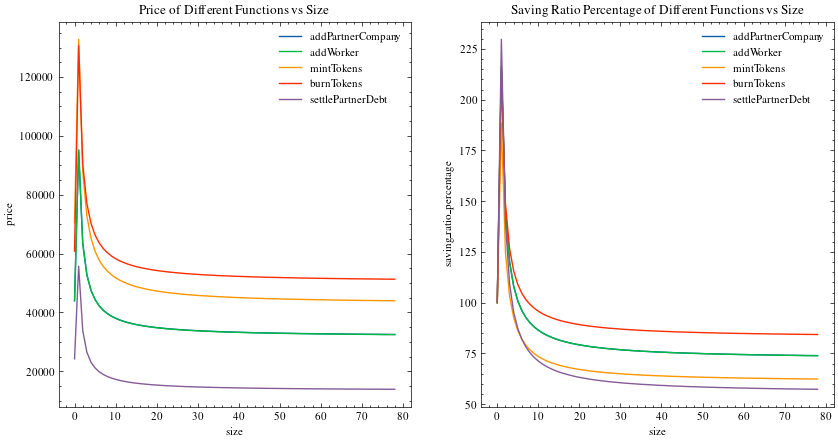

In [10]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])
# plt.rcParams.update({'figure.dpi': '100'})


# Load the JSON data from the file
with open("../test/ICSOC/Accountable/data.json", "r") as file:
    data = json.load(file)

# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)

# Remove rows with null values
df = df.dropna()

# Calculate the Saving Ratio for each function
size_0_prices = df.loc[df['size'] == 0].drop(columns=['size']).squeeze()

# Calculate the Saving Ratio for each function and convert to percentage
df_saving_ratio = df.copy()


for function in size_0_prices.index:
    df_saving_ratio[function] = (df_saving_ratio[function] / size_0_prices[function]) * 100

# Create the plots using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Price of Different Functions vs Size
for function in df.columns[1:]:
    ax1.plot(df['size'], df[function], label=function)
ax1.set_title('Price of Different Functions vs Size')
ax1.set_xlabel('size')
ax1.set_ylabel('price')
ax1.legend()

# Saving Ratio Percentage of Different Functions vs Size
for function in df_saving_ratio.columns[1:]:
    ax2.plot(df_saving_ratio['size'], df_saving_ratio[function], label=function)

ax2.set_title('Saving Ratio Percentage of Different Functions vs Size')
ax2.set_xlabel('size')
ax2.set_ylabel('saving_ratio_percentage')
ax2.legend()

plt.show()